# Анализ данных в сфере Электронной торговли

Проанализируем набор данных, который содержит все транзакции, происходящие между 01/12/2010 и 09/12/2011 для зарегистрированных пользователей онлайн-сайта. Попробуем произвести предобработку данных и EDA (Исследовательский анализ данных).

In [5]:
#Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot

In [6]:
data = pd.read_csv('/Users/a1/Desktop/Мои проекты/E-Commerce/data.csv', encoding="ISO-8859-1")

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Набор данных содержит в себе следующие столбцы:

`InvoiceNo` - Номер транзакции, номинальный, 6-значный номер, однозначно присвоенный каждой операции. Если этот код начинается с буквы с, он указывает на отмену

`StockCode` - Код продукта (элемента). Номинальный, 5-значный номер, однозначно присвоенный каждому отдельному продукту.

`Description` - Краткое описание товара.

`Quantity` - Количество данного товара.

`InvoiceDate` - Дата и время транзакции. Числовые, день и время создания каждой транзакции.

`UnitPrice` - Цена продукции на единицу стерлингов.

`CustomerID` - Уникальный ID пользователя.

`Country` - Название страны, в которой проживает каждый клиент.

**Мы видим, что в файле данных есть информация, предоставленная для каждой транзакции. Посмотрим на номер счета-фактуры и идентификатор клиента первых записей. Здесь мы видим, что один клиент с идентификатором 17850 из Великобритании сделал один заказ с номером InvoideNo 536365. Клиент заказал несколько продуктов с различными складскими кодами, описаниями, ценами за единицу и количеством. Кроме того, мы видим, что InvoiceDate был одинаковым для этих продуктов.**

In [8]:
#Выведем размер таблицы (Строки, Столбцы)
data.shape

(541909, 8)

In [9]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
#Выведем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Исходя из данных, в нашем датасете содержатся пропущенные значения в столбце CustomerID, также было бы неплохо перевести столбец с датой транзакции, а именно InvoiceDate в тип DateTime64**

In [11]:
#Просмотрим основные хараектеристики датасета
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Важно заметить, что для столбца UnitPrice наблюдаются очень большие отрицательные значения, что явно является выбросом. Также для столбца Quantity наблюдаются аномальные выбросы с минимальным значением в -80000 и максимальным 80000. Данные значения стоит отбросить, поскольку они будут очень сильно искажать наши данные.**

In [12]:
#Резюмируем общую информацию о нашем датасете
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(data)

------------------------------- SHAPE --------------------------------
Rows: 541909
Columns: 8
------------------------------- TYPES --------------------------------
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8

/var/folders/4l/7yb4w59x1k3bhq8mbgbzjry00000gn/T/ipykernel_58208/2683468922.py:17: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Предобработка данных

In [13]:
#Поставим изначальный размер строк, чтобы после предобработки определить, какой объём данных мы почистили
data.shape

(541909, 8)

In [14]:
#С помощью запроса избавимся от отрицательных значнений в столбцах Quantity и UnitPrice
data = data.query('Quantity > 0 and UnitPrice > 0')

In [15]:
#Также избавимся от очень высокий значений в этих столбцах
data = data.query('Quantity < 10000 and UnitPrice < 38970')

In [16]:
#Проверим дубликаты в данных
data.duplicated().sum()

5226

In [17]:
#Применяем метод сброса дубликатов
data.drop_duplicates(inplace=True)

In [18]:
#Все дубликаты почищены
data.duplicated().sum()

0

In [19]:
#Проверим пропуски в нашем датасете
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

**При анализе пропусков в датасете важно отметить, что 25% записей имеют пропущенные значения в столбце с уникальным ID пользователя. При наличии данных невозможно условно исчислять величины для пользователя, и поэтому эти позиции бесполезны для текущей работы. К сожалению придётся избавиться от значительной части данных.**

In [20]:
# Удаляем пропуски в столбце с CustomerID
data.dropna(subset=['CustomerID'], inplace=True)

In [21]:
#Проверяем что пропуски действительно удалились
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
#Переводим столбце с датой транзакции из типа со строковыми значениями в тип Datetime64
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [23]:
#Также перевдём столбец с ID пользователя из типа с плавающей точкой в тип с целочисленными данными
data = data.astype({'CustomerID' : 'int'})

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392690 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392690 non-null  object        
 1   StockCode    392690 non-null  object        
 2   Description  392690 non-null  object        
 3   Quantity     392690 non-null  int64         
 4   InvoiceDate  392690 non-null  datetime64[ns]
 5   UnitPrice    392690 non-null  float64       
 6   CustomerID   392690 non-null  int64         
 7   Country      392690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [25]:
392690 / 541909

0.7246419601815065

Потеряли около 27% данных в ходе предобработки, что является очень большим процентом, в случае с CustomerID, который содержал в себе 25% данных, оставлять эти значения было бы бессмысленно, поскольку мы не можем не обладаем достаточной информацией, каким образом их заполнять.

### Промежуточный вывод


* Изменили столбцы на необходимые типы данных.

* Избавились от аномальных значений, почистили дубликаты и пропущенные значения, но к сожалению пожертвовали 27% данных, но зато теперь мы имеем очищенные данные, c которыми уже можно проводить дальнейший исследовательский анализ данных.



# Исследовательский анализ данных (EDA)

In [26]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [27]:
#Сгруппируем наши данные по странам и посчитаем общую сумму покупок
data_country_sales = data.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False).head(10)

In [28]:
data_country_sales

Country
United Kingdom    1037942.744
France              36788.980
Germany             33499.580
EIRE                32134.960
Singapore           12949.990
Spain                9492.390
Portugal             8636.430
Belgium              7372.850
Switzerland          6389.270
Netherlands          6247.730
Name: UnitPrice, dtype: float64

**Можем убедиться, что целевой аудиторией интернет-магазина являются пользователи из Великобритании, которые осуществили покупку на сумму более 1 миллиона стерлингов, ближайшей к ней является Франция, и всего лишь ~ 37000 стерлингов.**


In [29]:
data.InvoiceDate.min()


Timestamp('2010-12-01 08:26:00')

In [30]:
data.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

**Убедились, что даты всех транзакций проходят в период с 2010-12-01 по 2011-12-09**

In [31]:
#Посчитаем колличество транзакций
data.groupby('Country', as_index=False).agg({'CustomerID':'count'}).sort_values('CustomerID', ascending=False).head(15)


,Country,CustomerID
35,United Kingdom,349201
14,Germany,9025
13,France,8326
10,EIRE,7226
30,Spain,2479
23,Netherlands,2359
3,Belgium,2031
32,Switzerland,1841
26,Portugal,1453
0,Australia,1181


In [32]:
#Посчитаем уникальное колличество пользователей, которые осуществили транзакции
data[data['CustomerID'] > 0].groupby('Country', as_index=False).agg({'CustomerID': pd.Series.nunique}).sort_values('CustomerID', ascending=False).head(15)

,Country,CustomerID
35,United Kingdom,3919
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


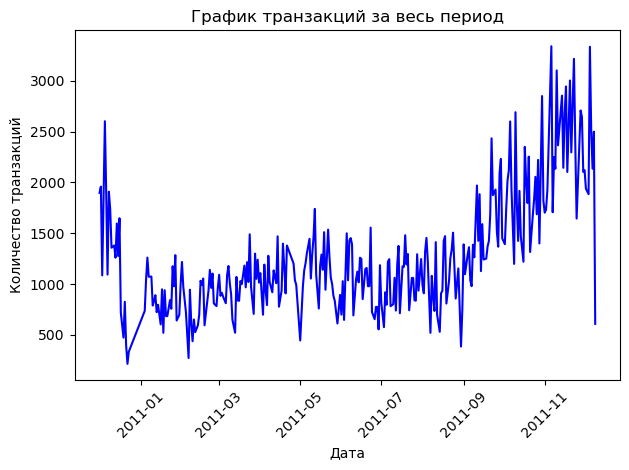

In [33]:
# Построим график, который отображает тенденцию транзакций по годам
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].dt.date
daily_transactions = data.groupby('Date').size()

plt.plot(daily_transactions, color='blue')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.title('График транзакций за весь период')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Исходя из графика, можем заметить прирост по количеству транзакций на месяц сентябрь, c последующим ростом до конца до декабря.**

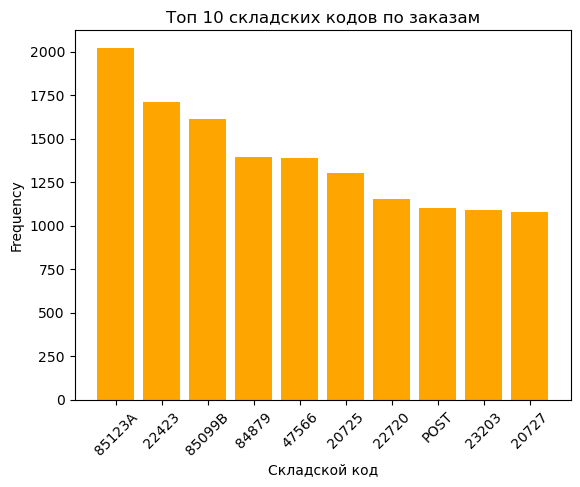

In [34]:
# Получим столбчатую диаграмму с ТОП-10 складскими кодами по частоте транзакций.
stock_counts = data['StockCode'].value_counts().head(10)
plt.bar(stock_counts.index, stock_counts.values, color='orange')
plt.xlabel('Складской код')
plt.ylabel('Frequency')
plt.title('Топ 10 складских кодов по заказам')
plt.xticks(rotation=45)
plt.show()


In [35]:
#Узнаем описание товаров которые вошли в ТОП-10 по транзакциям за всё время.
stock_description_count = data[['StockCode', 'Description']].value_counts().head(10)

In [36]:
stock_description_count

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2016
22423      REGENCY CAKESTAND 3 TIER              1713
85099B     JUMBO BAG RED RETROSPOT               1615
84879      ASSORTED COLOUR BIRD ORNAMENT         1395
47566      PARTY BUNTING                         1389
20725      LUNCH BAG RED RETROSPOT               1303
22720      SET OF 3 CAKE TINS PANTRY DESIGN      1152
POST       POSTAGE                               1099
20727      LUNCH BAG  BLACK SKULL.               1078
21212      PACK OF 72 RETROSPOT CAKE CASES       1050
dtype: int64



**В ТОП по продажам вошли:**

1.`БЕЛЫЙ ПОДВЕСНОЙ ДЕРЖАТЕЛЬ T-LIGHT В ВИДЕ СЕРДЦА`

2.`ПОДСТАВКА ДЛЯ ТОРТА REGENCY 3 УРОВНЯ`

3.`ДЖАМБО СУМКА КРАСНАЯ РЕТРОСПОТ`

4.`ОРНАМЕНТ ДЛЯ ПТИЦ РАЗНОГО ЦВЕТА`

5.`РУЧКА ДЛЯ ВЕЧЕРИНКИ`

6.`СУМКА ДЛЯ ОБЕДА RED RETROSPOT`

7.`НАБОР ИЗ 3 ФОРМ ДЛЯ ТОРТА ДИЗАЙН КЛАДОВОЙ`

8.`ПОЧТОВАЯ ОПЛАТА`

9.`СУМКА ДЛЯ ЛАНЧА С ЧЕРНЫМ ЧЕРЕПОМ.`

10.`УПАКОВКА ИЗ 72 ЯЩИКОВ ДЛЯ ТОРТА RETROSPOT.`

ТОП-10 пользователей:
CustomerID
17841    7676
14911    5670
14096    5111
12748    4412
14606    2677
15311    2366
14646    2076
13089    1814
13263    1667
14298    1637
dtype: int64


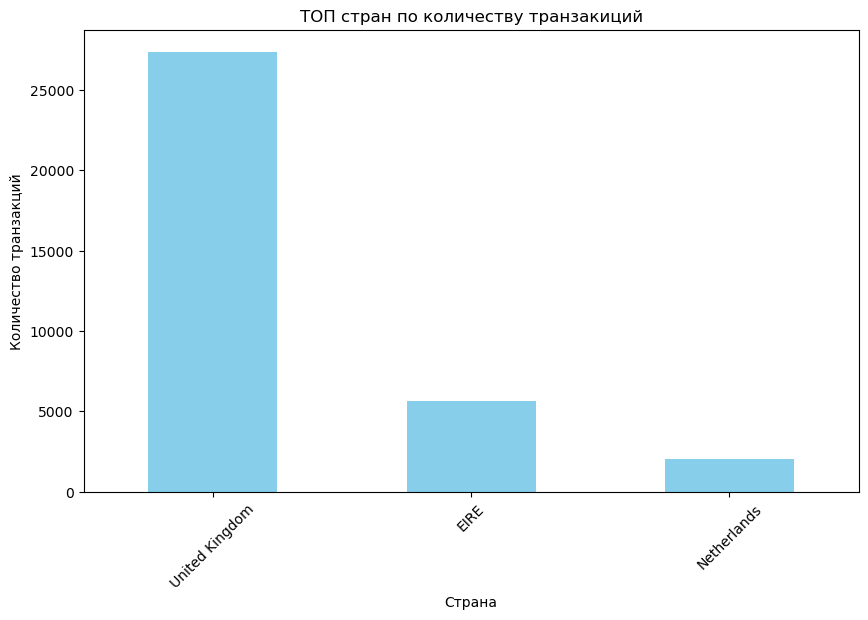

In [37]:
# Узнаем сколько транзакций осуществили пользователи и узнаем их страну
top_users = data.groupby('CustomerID').size().nlargest(10)

# Вывод ТОП-10 пользователей
print("ТОП-10 пользователей:")
print(top_users)

# Получение страны каждого пользователя
top_users_country = data[data['CustomerID'].isin(top_users.index)]['Country']

# Построение графика распределения стран для ТОП-10 пользователей
plt.figure(figsize=(10, 6))
top_users_country.value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Страна')
plt.ylabel('Количество транзакций')
plt.title('ТОП стран по количеству транзакиций')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Группировка данных по CustomerID и подсчет общего количества купленных товаров для каждого пользователя
total_quantity_top_users = data.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)

# Выбор ТОП-10 пользователей
top_10_users = total_quantity_top_users.nlargest(10)

# Вывод общего количества купленных товаров для ТОП-10 пользователей
print("Общее количество купленных товаров для ТОП-10 пользователей:")
print(top_10_users)

Общее количество купленных товаров для ТОП-10 пользователей:
CustomerID
14646    196915
14911     80240
12415     77374
17450     69973
17511     64549
18102     64124
13694     63312
14298     58343
14156     57768
16684     50255
Name: Quantity, dtype: int64


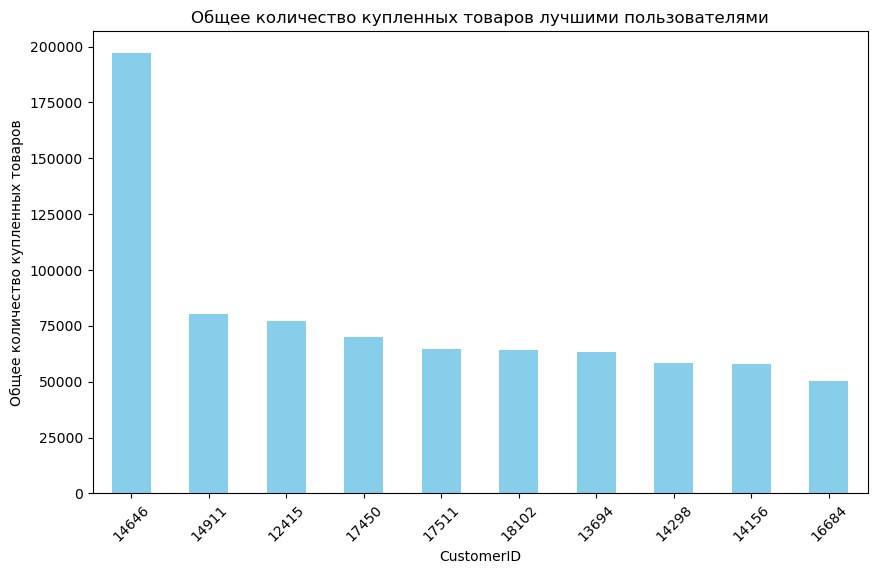

In [39]:
# ТОП пользователей по количеству купленных товаров
plt.figure(figsize=(10, 6))
total_quantity_top_users.plot(kind='bar', color='skyblue')
plt.xlabel('CustomerID')
plt.ylabel('Общее количество купленных товаров')
plt.title('Общее количество купленных товаров лучшими пользователями')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Найдем топ 10 пользователей, которые потратили больше всего денег на покупку товаров
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Группировка данных по CustomerID и подсчет общей суммы потраченных денег для каждого пользователя
total_spent_top_users = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Вывод ТОП-10 пользователей, которые потратили больше всего денег на сайте
print("ТОП-10 пользователей, которые потратили больше всего денег на сайте:")
print(total_spent_top_users)

ТОП-10 пользователей, которые потратили больше всего денег на сайте:
CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
16684     66653.56
14096     65164.79
Name: TotalPrice, dtype: float64


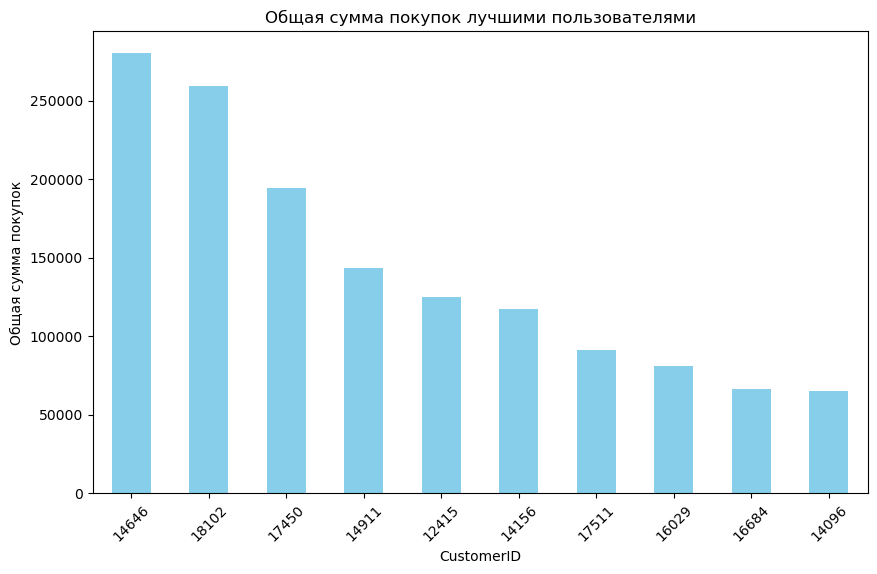

In [124]:
# Построим график по пользователям, которые потратили больше всех денег
plt.figure(figsize=(10, 6))
total_spent_top_users.plot(kind='bar', color='skyblue')
plt.xlabel('CustomerID')
plt.ylabel('Общая сумма покупок')
plt.title('Общая сумма покупок лучшими пользователями')
plt.xticks(rotation=45)
plt.show()

# Итоговый результат

*Произвели просмотр данных, очистили данные от дубликатов и проущенных значений, убедились что в данных есть анмальные значения, от которых также успешно избавились.*

*Провели исследовательский анализ данных, в ходе которого узнали что около 4000 пользователей осуществили почти целых 400,000 транзакций, узнали что подавляющим большинством являются пользователи из Великобритании, около 90%.*

*На графиках увидели, что рост количества транзакций приходится на период с сентября до начала декабря, из чего мы можем сделать вывод,что возможно это обусловленно подготовкой к Новогодним праздникам и необходимостью покупки разлчиных новогодних подарков или украшений. Об этом говорит нам ТОП купленных товаров, который включает в себя разлчные подставки в виде сердец, сумки и формы для приготовления тортов.*

*Также мы узнали, в топ 3 страны по покупкам являются Великобритания, Ирландия и Нидерланды, к слову Великобритания осуществила более 25,000 транзакций (Примерно 80 процентов транзакций от всего ТОП-3 стран).*

*Также мы узнали 10 пользователей по количеству купленных товаров за весь период, ТОП-1 приобрел 196,719 товаров, скорее всего он является оптовиком, который в дальнейшем перепродает купленную продукцию, в сравнении с ним, ТОП-2 приобрел 77,242 товаров. В последнем расчёте узнали, что ТОП-10 пользователей принесли практически всю выручку онлайн-магазина, а ТОП-1, тот же самый, что и купил 196,7§9 товаров, принёс более четверти всей выручки.*